In [1]:
#import libraries
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from fim import arules
from operator import attrgetter
from fim import apriori

In [2]:
df_customers = pd.read_csv("olist_customers_dataset.csv")
df_geo = pd.read_csv("olist_geolocation_dataset.csv")
df_items = pd.read_csv("olist_order_items_dataset.csv")
df_payments = pd.read_csv("olist_order_payments_dataset.csv")
df_orders = pd.read_csv("olist_orders_dataset.csv")
df_products = pd.read_csv("olist_products_dataset.csv")
df_sellers = pd.read_csv("olist_sellers_dataset.csv")
product_category_name = pd.read_csv("product_category_name_translation.csv")

In [3]:
df = df_orders.merge(df_items, on='order_id', how='inner')
df = df.merge(df_payments, on='order_id', how='inner', validate='m:m')
df = df.merge(df_products, on='product_id', how='inner')
df = df.merge(df_customers, on='customer_id', how='inner')
df = df.merge(df_sellers, on='seller_id', how='inner')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117601 entries, 0 to 117600
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117601 non-null  object 
 1   customer_id                    117601 non-null  object 
 2   order_status                   117601 non-null  object 
 3   order_purchase_timestamp       117601 non-null  object 
 4   order_approved_at              117586 non-null  object 
 5   order_delivered_carrier_date   116356 non-null  object 
 6   order_delivered_customer_date  115034 non-null  object 
 7   order_estimated_delivery_date  117601 non-null  object 
 8   order_item_id                  117601 non-null  int64  
 9   product_id                     117601 non-null  object 
 10  seller_id                      117601 non-null  object 
 11  shipping_limit_date            117601 non-null  object 
 12  price                         

In [5]:
df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1245
order_delivered_customer_date    2567
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
product_category_name            1698
product_name_lenght              1698
product_description_lenght       1698
product_photos_qty               1698
product_weight_g                   20
product_length_cm                  20
product_height_cm                  20
product_width_cm                   20
customer_uni

In [6]:
df_clean = df.dropna()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113390 entries, 0 to 117600
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113390 non-null  object 
 1   customer_id                    113390 non-null  object 
 2   order_status                   113390 non-null  object 
 3   order_purchase_timestamp       113390 non-null  object 
 4   order_approved_at              113390 non-null  object 
 5   order_delivered_carrier_date   113390 non-null  object 
 6   order_delivered_customer_date  113390 non-null  object 
 7   order_estimated_delivery_date  113390 non-null  object 
 8   order_item_id                  113390 non-null  int64  
 9   product_id                     113390 non-null  object 
 10  seller_id                      113390 non-null  object 
 11  shipping_limit_date            113390 non-null  object 
 12  price                          1133

In [7]:
df_clean.drop(columns = ["product_name_lenght","product_description_lenght","product_photos_qty","product_weight_g","product_length_cm","product_height_cm","product_width_cm"],inplace=True)

/var/folders/qy/g8t0xs116mgdb7czqbzt0mf40000gn/T/ipykernel_1675/2083017671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(columns = ["product_name_lenght","product_description_lenght","product_photos_qty","product_weight_g","product_length_cm","product_height_cm","product_width_cm"],inplace=True)


In [8]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113390 entries, 0 to 117600
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113390 non-null  object 
 1   customer_id                    113390 non-null  object 
 2   order_status                   113390 non-null  object 
 3   order_purchase_timestamp       113390 non-null  object 
 4   order_approved_at              113390 non-null  object 
 5   order_delivered_carrier_date   113390 non-null  object 
 6   order_delivered_customer_date  113390 non-null  object 
 7   order_estimated_delivery_date  113390 non-null  object 
 8   order_item_id                  113390 non-null  int64  
 9   product_id                     113390 non-null  object 
 10  seller_id                      113390 non-null  object 
 11  shipping_limit_date            113390 non-null  object 
 12  price                          1133

# Some charts

In [9]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

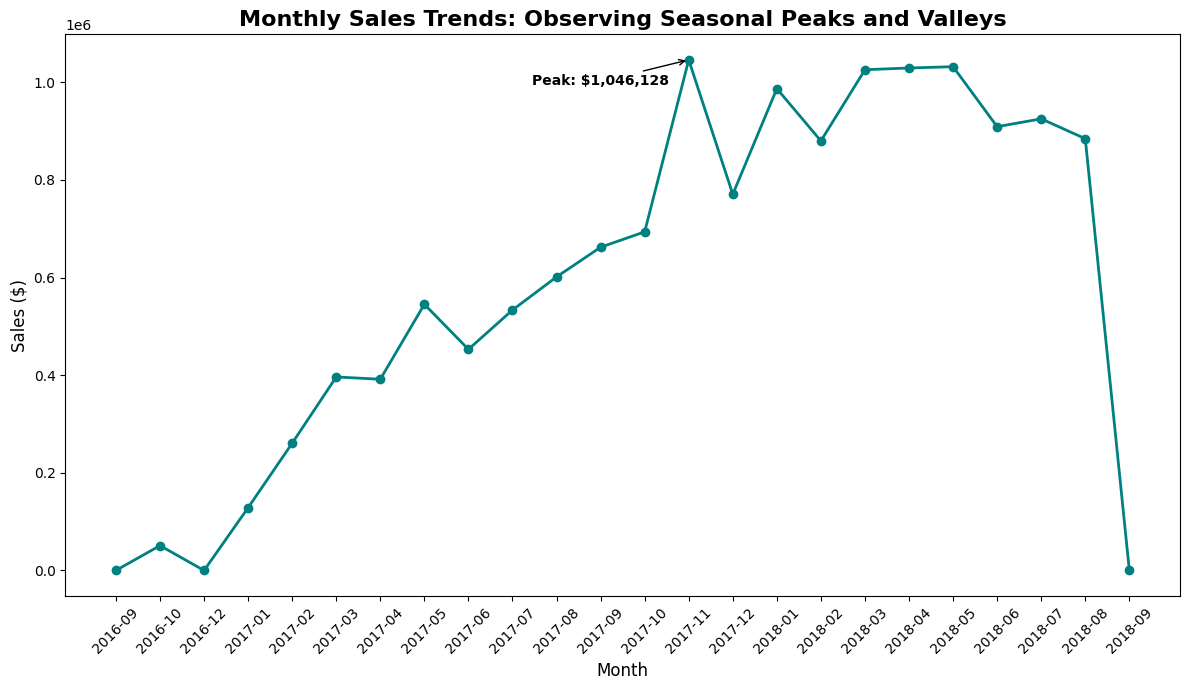

In [10]:
#Monthly Seasonal Trends
monthly_sales = df.groupby(df['order_purchase_timestamp'].dt.to_period('M'))['price'].sum()

# Plot with enhancements
plt.figure(figsize=(12, 7))
plt.plot(
    monthly_sales.index.astype(str),
    monthly_sales.values,
    marker='o',
    color='teal',
    linewidth=2,
    markersize=6
)

# Enhancing titles and labels
plt.title("Monthly Sales Trends: Observing Seasonal Peaks and Valleys", fontsize=16, weight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Sales ($)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Adding annotations for storytelling
peak_month = monthly_sales.idxmax()
peak_value = monthly_sales.max()
plt.annotate(
    f"Peak: ${peak_value:,.0f}",
    xy=(str(peak_month), peak_value),
    xytext=(monthly_sales.index.get_loc(peak_month) - 2, peak_value * 0.95),  # Move annotation left and slightly down
    arrowprops=dict(facecolor='black', arrowstyle='->'),
    fontsize=10,
    weight='bold',
    color='black',
    ha='center')

# Adjusting layout
plt.tight_layout()

# Display the plot
plt.show()

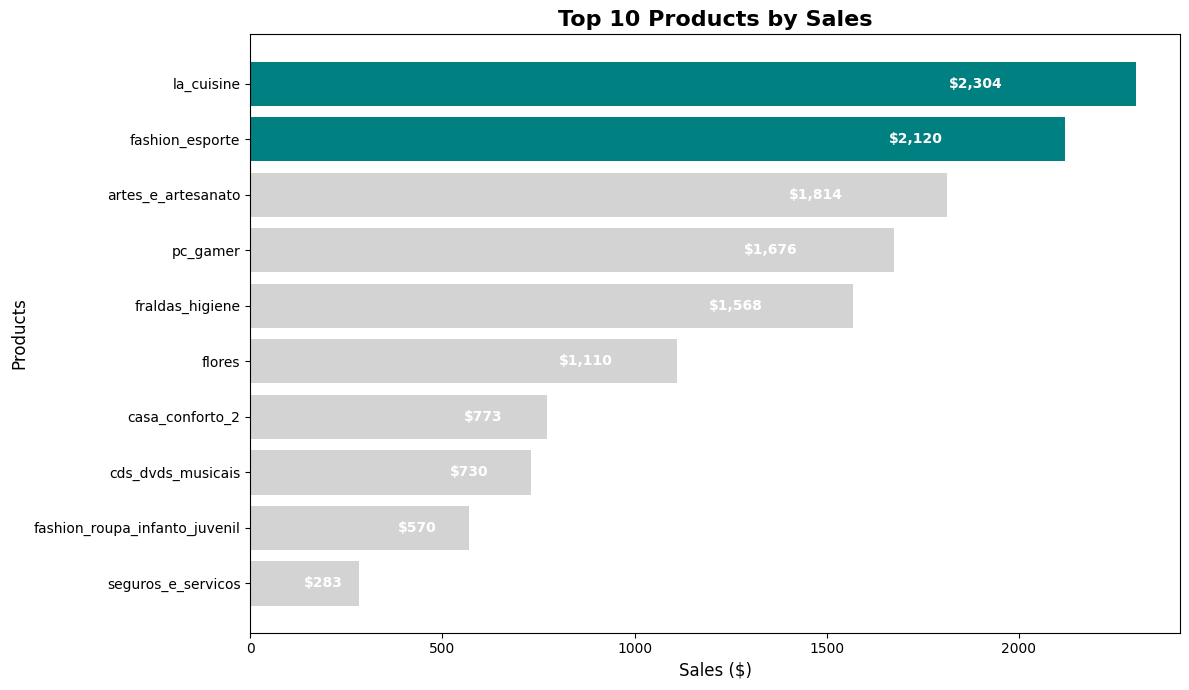

In [11]:
# Calculate top 10 products by price
top_products = df.groupby('product_category_name')['price'].sum().sort_values().head(10)

# Plot with enhancements
plt.figure(figsize=(12, 7))
colors = ['teal' if i > 7 else 'lightgray' for i in range(len(top_products))]
bars = plt.barh(top_products.index, top_products.values, color=colors)

# Enhancing titles and labels
plt.title("Top 10 Products by Sales", fontsize=16, weight='bold')
plt.xlabel("Sales ($)", fontsize=12)
plt.ylabel("Products", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adding annotations inside the bars
for bar in bars:
    width = bar.get_width()
    plt.text(
        width * 0.85,  # Position slightly left of the end of the bar
        bar.get_y() + bar.get_height() / 2,  # Vertically center the text
        f"${width:,.0f}",  # Format as dollars
        va='center',
        ha='right',
        color='white',
        fontsize=10,
        weight='bold')

# Adjusting layout
plt.tight_layout()

# Display the plot
plt.show()

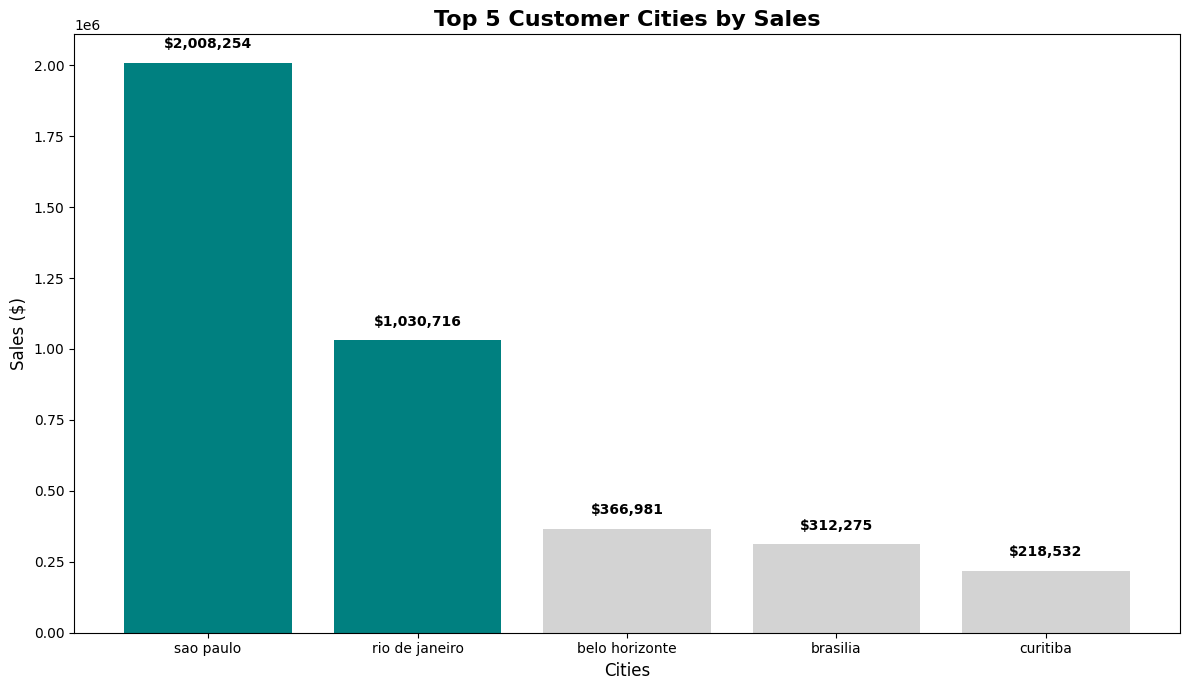

In [12]:
# Calculate and sort the top 5 geographic regions by customer sales
top_geo_customer = df.groupby('customer_city')['price'].sum().sort_values(ascending=False).head(5)

# Plot with enhancements
plt.figure(figsize=(12, 7))
colors = ['teal' if i < 2 else 'lightgray' for i in range(len(top_geo_customer))]  # Highlight top 2 bars
bars = plt.bar(
    top_geo_customer.index,
    top_geo_customer.values,
    color=colors
)

# Enhancing titles and labels
plt.title("Top 5 Customer Cities by Sales", fontsize=16, weight='bold')
plt.xlabel("Cities", fontsize=12)
plt.ylabel("Sales ($)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adding annotations outside the bars
for bar in bars:
    value = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate: center of each bar
        value + (top_geo_customer.max() * 0.02),  # Y-coordinate: slightly above the bar
        f"${value:,.0f}",  # Format as dollars
        ha='center',  # Center-align text horizontally
        va='bottom',  # Align text above the bar
        fontsize=10,
        color='black',
        weight='bold'
    )

# Adjusting layout
plt.tight_layout()

# Display the plot
plt.show()

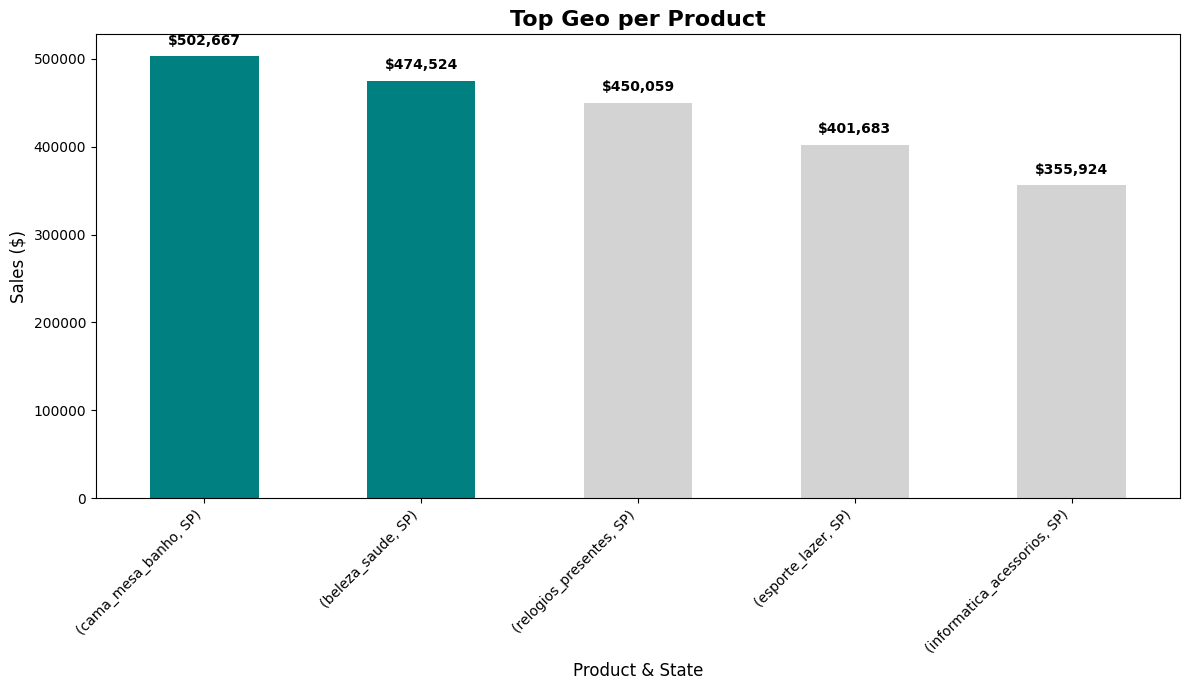

In [13]:
# Calculate and sort the top 5 product-category and customer-state combinations by sales
top_geo_product = (
    df.groupby(['product_category_name', 'customer_state'])['price']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

# Plot with enhancements
plt.figure(figsize=(12, 7))
colors = ['teal' if i < 2 else 'lightgray' for i in range(len(top_geo_product))]
bars = top_geo_product.plot(
    kind='bar',
    stacked=True,
    color=colors,
    legend=False
)

# Enhancing titles and labels
plt.title("Top Geo per Product", fontsize=16, weight='bold')
plt.xlabel("Product & State", fontsize=12)
plt.ylabel("Sales ($)", fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')  # Rotate x-axis labels for clarity
plt.yticks(fontsize=10)

# Adding annotations above the bars
for bar in bars.patches:
    value = bar.get_height()
    if value > 0:  # Only annotate bars with values
        plt.text(
            bar.get_x() + bar.get_width() / 2,  # Center of the bar
            value + (top_geo_product.max() * 0.02),  # Just above the bar
            f"${value:,.0f}",  # Format as dollars
            ha='center',  # Center-align text horizontally
            va='bottom',  # Place above the bar
            fontsize=10,
            color='black',  # Black text for visibility
            weight='bold'
        )

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

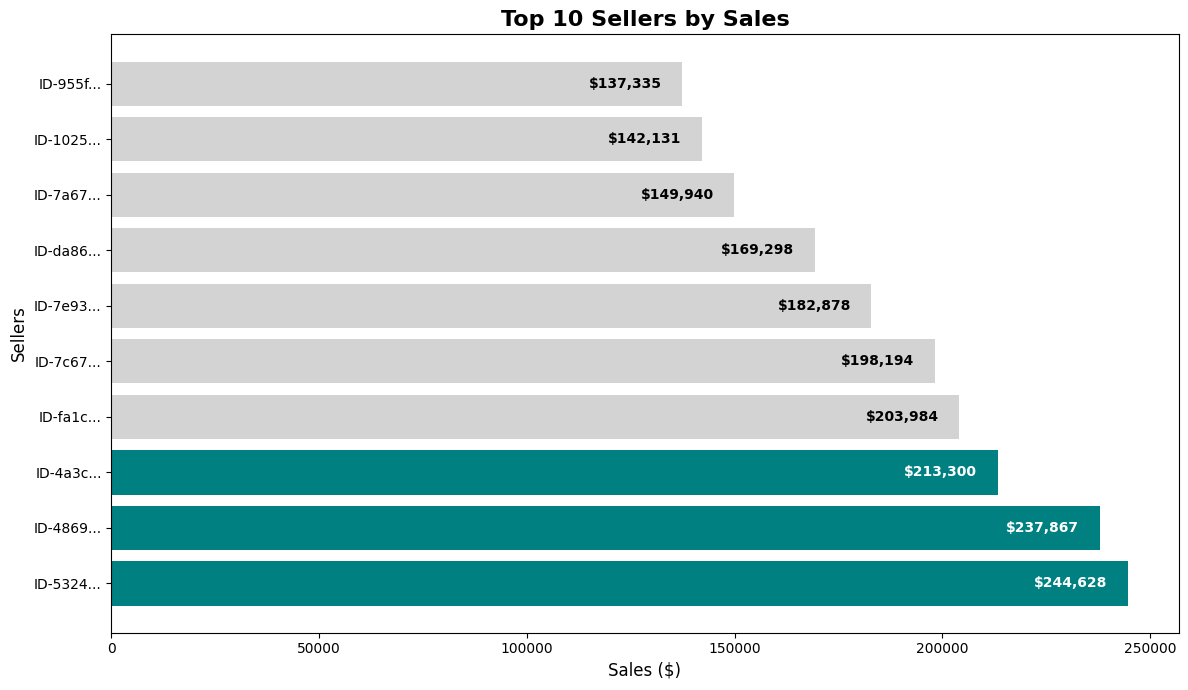

In [14]:
# Calculate and sort the top 10 sellers by sales
top_sellers = df.groupby('seller_id')['price'].sum().sort_values(ascending=False).head(10)

# Create a shortened version of seller IDs for display
short_seller_ids = [f"ID-{str(seller)[:4]}..." for seller in top_sellers.index]

# Plot with enhancements
plt.figure(figsize=(12, 7))
colors = ['lightgray' if i > 2 else 'teal' for i in range(len(top_sellers))]
bars = plt.barh(short_seller_ids, top_sellers.values, color=colors)

# Enhancing titles and labels
plt.title("Top 10 Sellers by Sales", fontsize=16, weight='bold')
plt.xlabel("Sales ($)", fontsize=12)
plt.ylabel("Sellers", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adding annotations inside or beside the bars
for bar, value, color in zip(bars, top_sellers.values, colors):
    text_color = 'black' if color == 'lightgray' else 'white'
    plt.text(
        value - (top_sellers.max() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        f"${value:,.0f}",
        va='center',
        ha='right',
        fontsize=10,
        color=text_color,
        weight='bold'
    )

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

# Pareto Analysis in Products

In [15]:
df=df_clean.copy()
df=df.groupby('product_category_name').agg({'payment_value':'sum',
                                         'order_id':'count'}).reset_index()

In [16]:
df.rename(columns={'payment_value':'Monetary','order_id':'NumberOfTransactions'},inplace=True)

In [17]:
df['Monetary%']=(df['Monetary']/df['Monetary'].sum())*100

In [18]:
df=df.sort_values(by='Monetary%',ascending=False).reset_index()

In [19]:
df['Monetary_Cumulative%']=df['Monetary%'].cumsum()

In [20]:
df.head()

,index,product_category_name,Monetary,NumberOfTransactions,Monetary%,Monetary_Cumulative%
0,13,cama_mesa_banho,1692557.09,11649,8.666224,8.666224
1,11,beleza_saude,1620868.35,9761,8.299163,16.965387
2,44,informatica_acessorios,1549252.47,7897,7.932476,24.897863
3,54,moveis_decoracao,1393972.04,8553,7.137410,32.035272
4,66,relogios_presentes,1387046.31,6063,7.101949,39.137221


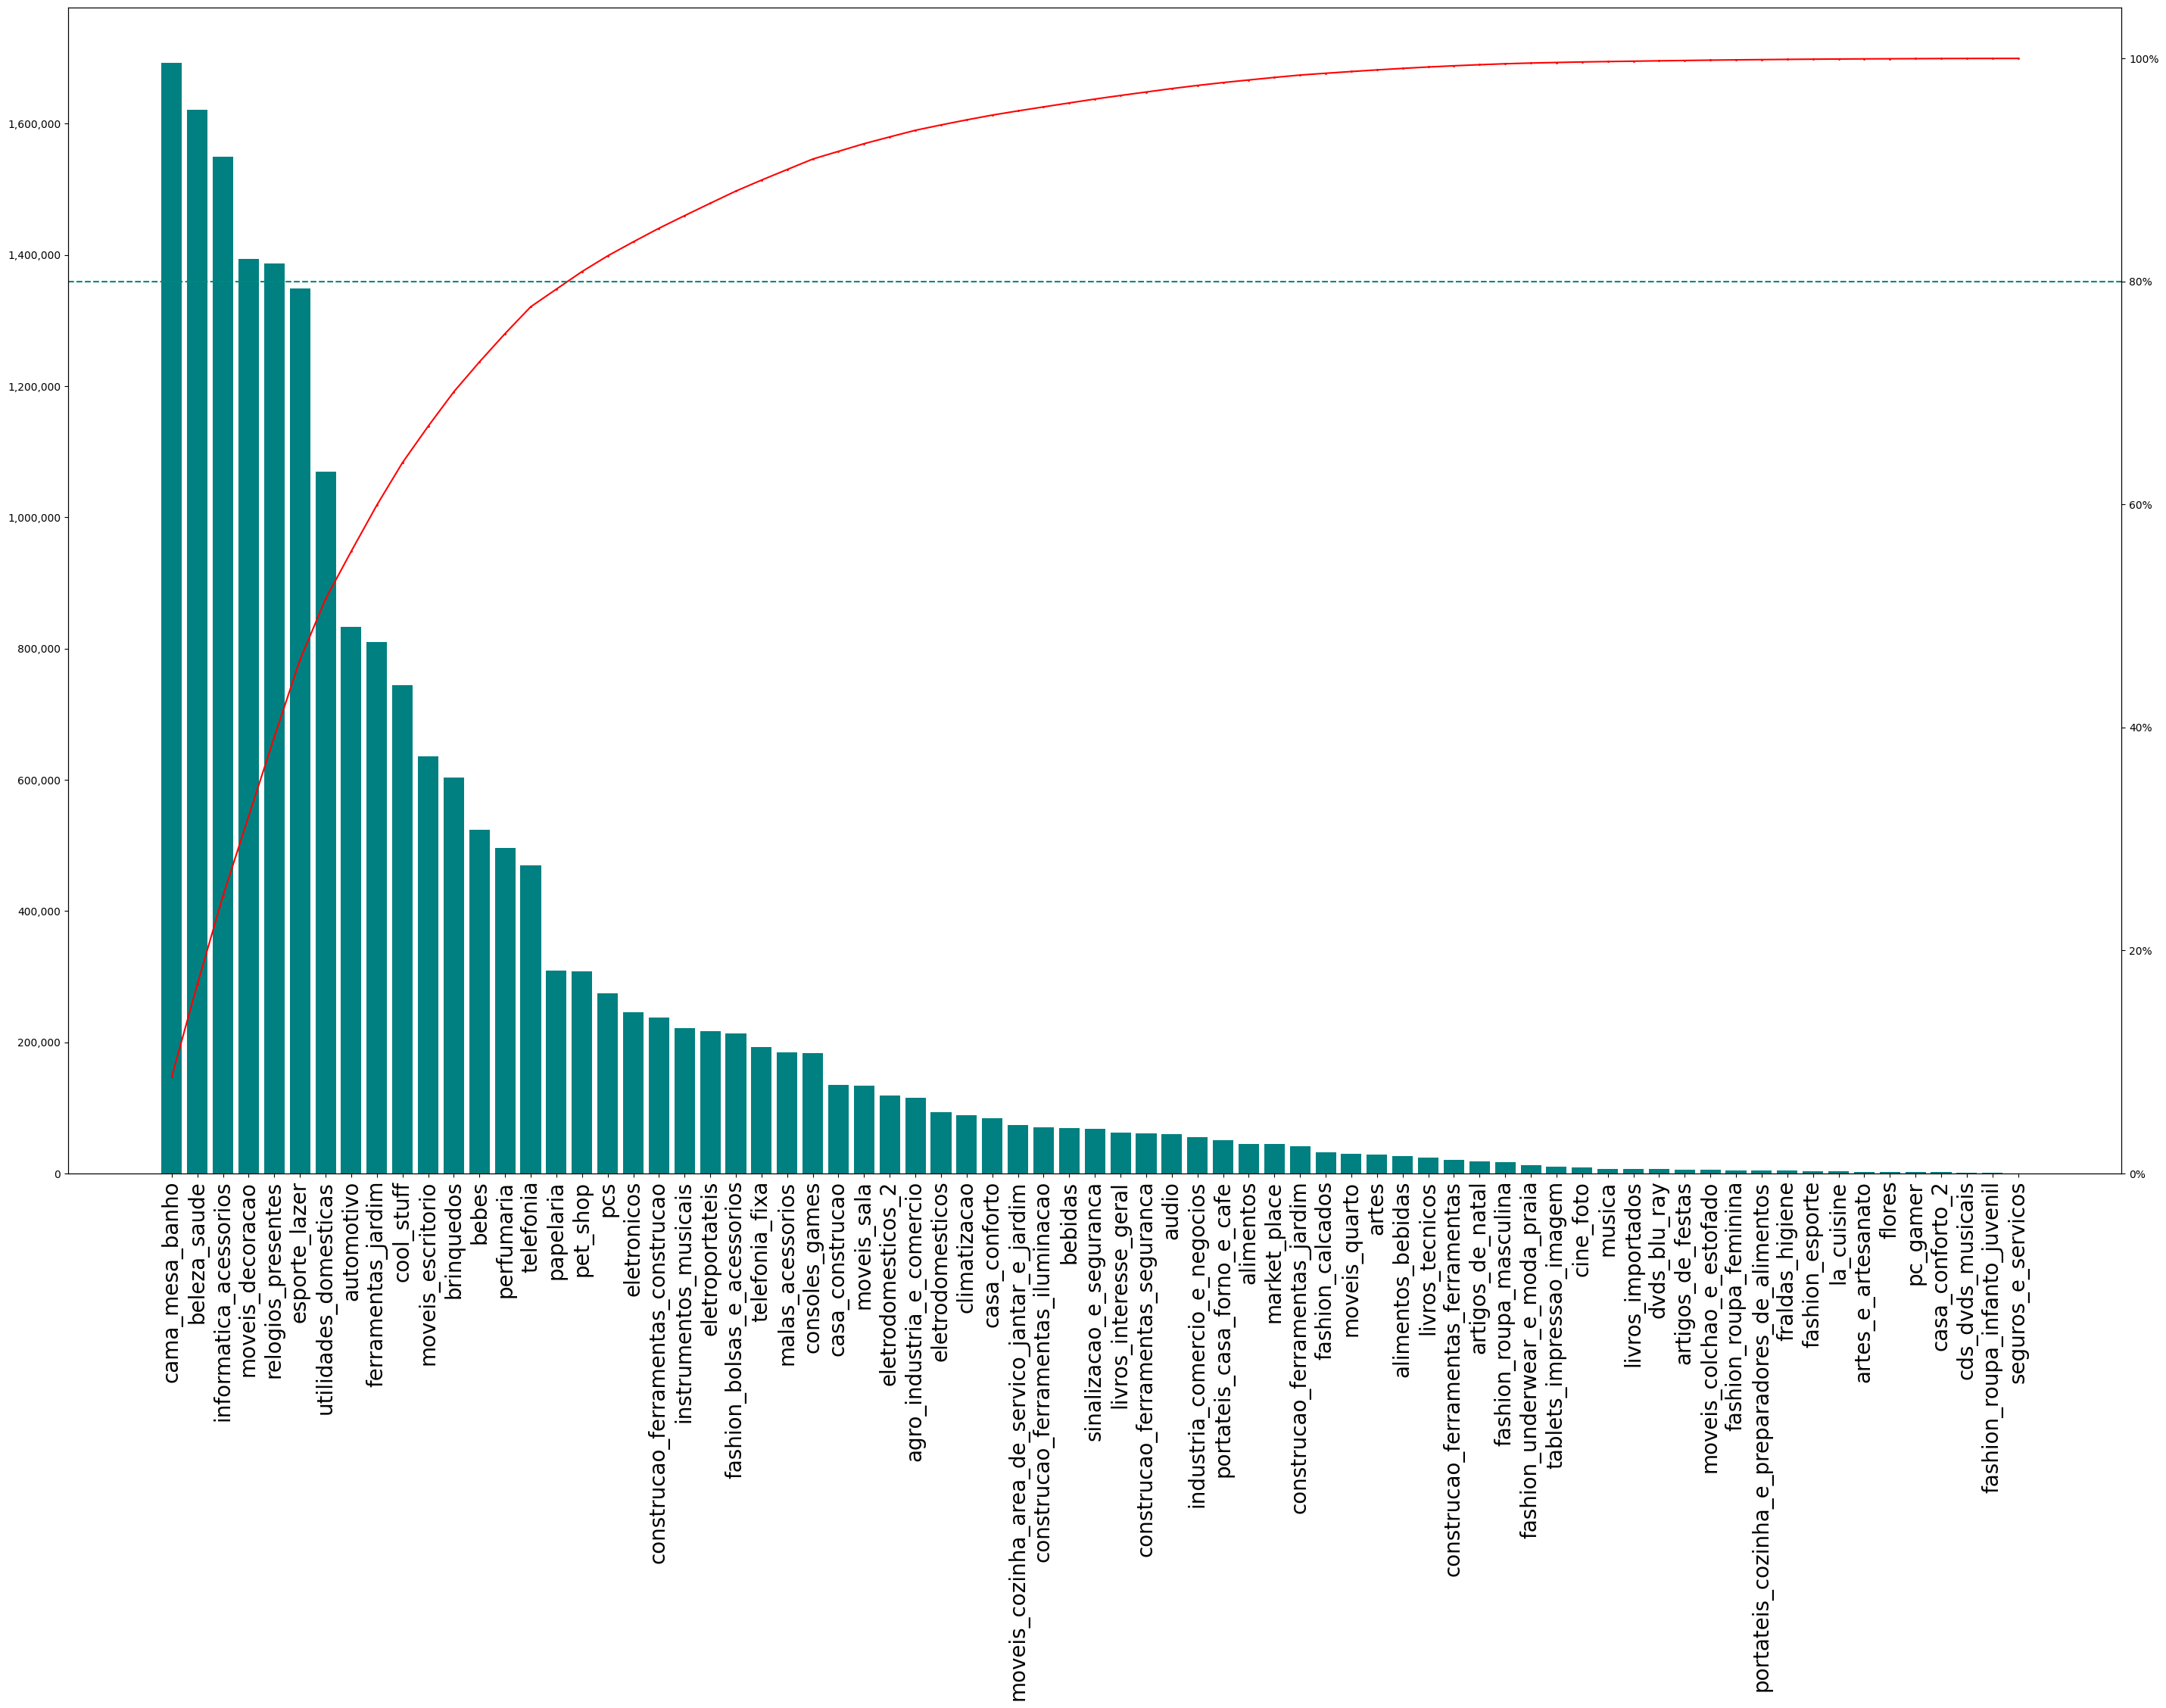

In [21]:
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as tkr

#define aesthetics for plot
color1='teal'
color2 = 'red'
#line_size = 1

#create basic bar plot
fig, ax = plt.subplots(figsize=(35,20))
ax.bar(df['product_category_name'], df['Monetary'], color=color1)

# #add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(df['product_category_name'], df['Monetary_Cumulative%'], color=color2, marker="D", ms=1)
ax2.axhline(80, color = "#008878", linestyle = "dashed", alpha = 1 )

ax.tick_params(axis='x', labelsize= 20, labelrotation=90)
ax2.set_ylim(ymin=0)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y,  p: format(int(y), ',')))

# display Pareto chart
plt.show()

In [22]:
df_clean

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,payment_installments,payment_value,product_category_name,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,1,18.12,utilidades_domesticas,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,1,2.00,utilidades_domesticas,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,1,18.59,utilidades_domesticas,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,1,141.46,perfumaria,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,31570,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,3,179.12,automotivo,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,14840,guariba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,3,195.00,bebes,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,17602,tupa,SP
117597,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1,b80910977a37536adeddd63663f916ad,...,5,271.01,eletrodomesticos_2,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,8290,sao paulo,SP
117598,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,d1c427060a0f73f6b889a5c7c61f2ac4,...,4,441.16,informatica_acessorios,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,37175,ilicinea,MG
117599,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2,d1c427060a0f73f6b889a5c7c61f2ac4,...,4,441.16,informatica_acessorios,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,37175,ilicinea,MG


# RFM Analysis

In [23]:
df_clean['order_purchase_timestamp']=pd.to_datetime(df_clean['order_purchase_timestamp'])
df_clean['order_approved_at']=pd.to_datetime(df_clean['order_approved_at'])
df_clean['order_delivered_carrier_date']=pd.to_datetime(df_clean['order_delivered_carrier_date'])
df_clean['order_delivered_customer_date']=pd.to_datetime(df_clean['order_delivered_customer_date'])
df_clean['order_estimated_delivery_date']=pd.to_datetime(df_clean['order_estimated_delivery_date'])

In [24]:
df_clean['Recency'] = (df_clean['order_purchase_timestamp'].max() - df_clean['order_purchase_timestamp']).dt.days

In [25]:
df_rfm=df_clean.groupby('customer_unique_id').agg({'Recency' : 'min',
                          'order_purchase_timestamp' : pd.Series.nunique,
                          'price' : 'sum'})

In [26]:
df_rfm.rename(columns={'Recency':'Recency', 'order_purchase_timestamp':'Frequency', 'price':'Monetary'}, inplace=True)

In [27]:
# Create RFM scores based on the quantiles of the distribution for each column

# Date from customer's last purchase. The most recent date gets 4 and the oldest gets 1
# qcut = quantile cut
df_rfm['recency_score'] = pd.qcut(df_rfm['Recency'], 4, labels=[4,3,2,1])

# Total number of days with purchase. The lowest frequency gets 1 and the highest gets 4
df_rfm['frequency_score'] = pd.qcut(df_rfm['Frequency'].rank(method='first'), 4, labels=[1,2,3,4])

# Total spend of each customer. The lowest amount gets 1 and the highest gets 4
df_rfm['monetary_score'] = pd.qcut(df_rfm['Monetary'], 4, labels=[1,2,3,4])

df_rfm.head()

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score
customer_unique_id,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,129.90,4,1,3
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90,3,1,1
0000f46a3911fa3c0805444483337064,536,1,69.00,1,1,2
0000f6ccb0745a6a4b88665a16c9f078,320,1,25.99,2,1,1
0004aac84e0df4da2b147fca70cf8255,287,1,180.00,2,1,4


In [28]:
df_rfm['RFM_Segment'] = df_rfm['recency_score'].astype(str)+df_rfm['frequency_score'].astype(str)+df_rfm['monetary_score'].astype(str)
df_rfm

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_Segment
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,129.90,4,1,3,413
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90,3,1,1,311
0000f46a3911fa3c0805444483337064,536,1,69.00,1,1,2,112
0000f6ccb0745a6a4b88665a16c9f078,320,1,25.99,2,1,1,211
0004aac84e0df4da2b147fca70cf8255,287,1,180.00,2,1,4,214
...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,446,1,1570.00,1,4,4,144
fffea47cd6d3cc0a88bd621562a9d061,261,1,64.89,2,4,2,242
ffff371b4d645b6ecea244b27531430a,567,1,89.90,1,4,2,142


In [29]:
df_rfm['Frequency'].unique()

array([ 1,  2,  3,  4,  6,  7,  9,  5, 14])

In [30]:
segt_map = {
    r'[3-4][3-4]4': 'VIP',
    r'[2-3-4][1-2-3-4]4': 'Top Recent',
    r'1[1-2-3-4]4': 'Top at Risk ',



    r'[3-4][3-4]3': 'High Promising',
    r'[2-3-4][1-2]3': 'High New',
    r'2[3-4]3': 'High Loyal',



    r'[3-4][3-4]2': 'Medium Potential',
    r'[2-3-4][1-2]2': 'Medium New',
    r'2[3-4]2': 'Medium Loyal',



    r'4[1-2-3-4]1': 'Low New',
    r'[2-3][1-2-3-4]1': 'Low Loyal',

    r'1[1-2-3-4][1-2-3]': 'Need Activation'
}

In [31]:
df_rfm['Segment_labels'] = df_rfm['RFM_Segment']
df_rfm['Segment_labels'] = df_rfm['Segment_labels'].replace(segt_map, regex=True)
df_rfm.reset_index(inplace=True)
df_rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_Segment,Segment_labels
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,129.90,4,1,3,413,High New
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90,3,1,1,311,Low Loyal
2,0000f46a3911fa3c0805444483337064,536,1,69.00,1,1,2,112,Need Activation
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,25.99,2,1,1,211,Low Loyal
4,0004aac84e0df4da2b147fca70cf8255,287,1,180.00,2,1,4,214,Top Recent


In [32]:
#Pareto Analysis in Segments

In [33]:
seg_pareto = df_rfm.groupby('Segment_labels').agg({'Monetary' : 'sum',
                                            'customer_unique_id' : 'count'}).reset_index()

In [34]:
seg_pareto

,Segment_labels,Monetary,customer_unique_id
0,High Loyal,341547.70,2821
1,High New,1080364.84,8878
2,High Promising,719471.75,5907
3,Low Loyal,339874.76,11436
4,Low New,175922.60,5894
5,Medium Loyal,205724.26,3060
6,Medium New,586124.06,8739
7,Medium Potential,366367.22,5448
8,Need Activation,1216477.86,17160
9,Top Recent,4084736.63,10971


In [35]:
seg_pareto.rename(columns={'customer_unique_id':'NumberOfCustomers'},inplace=True)

In [36]:
seg_pareto

,Segment_labels,Monetary,NumberOfCustomers
0,High Loyal,341547.70,2821
1,High New,1080364.84,8878
2,High Promising,719471.75,5907
3,Low Loyal,339874.76,11436
4,Low New,175922.60,5894
5,Medium Loyal,205724.26,3060
6,Medium New,586124.06,8739
7,Medium Potential,366367.22,5448
8,Need Activation,1216477.86,17160
9,Top Recent,4084736.63,10971


In [37]:
seg_pareto['Monetary%'] = seg_pareto['Monetary']/seg_pareto['Monetary'].sum()
seg_pareto.sort_values(by='Monetary%', ascending=False, inplace=True)

In [38]:
seg_pareto['Monetary_CumulativePercentage'] = (seg_pareto['Monetary'].cumsum() / seg_pareto['Monetary'].sum()*100).round(2)

In [39]:
seg_pareto['Customers_CumulativePercentage'] = (seg_pareto['NumberOfCustomers'].cumsum() / seg_pareto['NumberOfCustomers'].sum()*100).round(2)

In [40]:
seg_pareto

,Segment_labels,Monetary,NumberOfCustomers,Monetary%,Monetary_CumulativePercentage,Customers_CumulativePercentage
9,Top Recent,4084736.63,10971,0.299738,29.97,11.91
11,VIP,2279923.58,6042,0.167301,46.70,18.48
10,Top at Risk,2231134.97,5725,0.163721,63.08,24.69
8,Need Activation,1216477.86,17160,0.089265,72.00,43.33
1,High New,1080364.84,8878,0.079277,79.93,52.97
2,High Promising,719471.75,5907,0.052795,85.21,59.39
6,Medium New,586124.06,8739,0.043010,89.51,68.88
7,Medium Potential,366367.22,5448,0.026884,92.20,74.79
0,High Loyal,341547.70,2821,0.025063,94.71,77.86
3,Low Loyal,339874.76,11436,0.024940,97.20,90.28


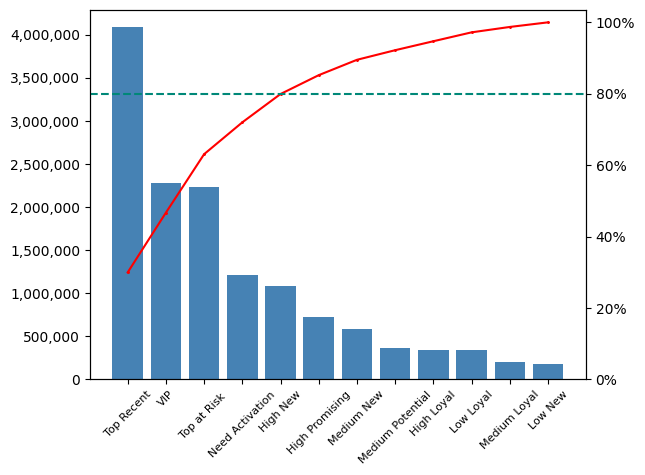

In [41]:
#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
#line_size = 1

#create basic bar plot
fig, ax = plt.subplots()
ax.bar(seg_pareto['Segment_labels'], seg_pareto['Monetary'], color=color1)

# #add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(seg_pareto['Segment_labels'], seg_pareto['Monetary_CumulativePercentage'], color=color2, marker="D", ms=1)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.axhline(80, color = "#008878", linestyle = "dashed", alpha = 1 ) # add 80% indicator line

ax.tick_params(axis='x', labelsize= 8, labelrotation=45)
ax2.set_ylim(ymin=0)
ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y,  p: format(int(y), ',')))

# display Pareto chart
plt.show()

# Pie Chart of Top 10 Product Categories in Brazil

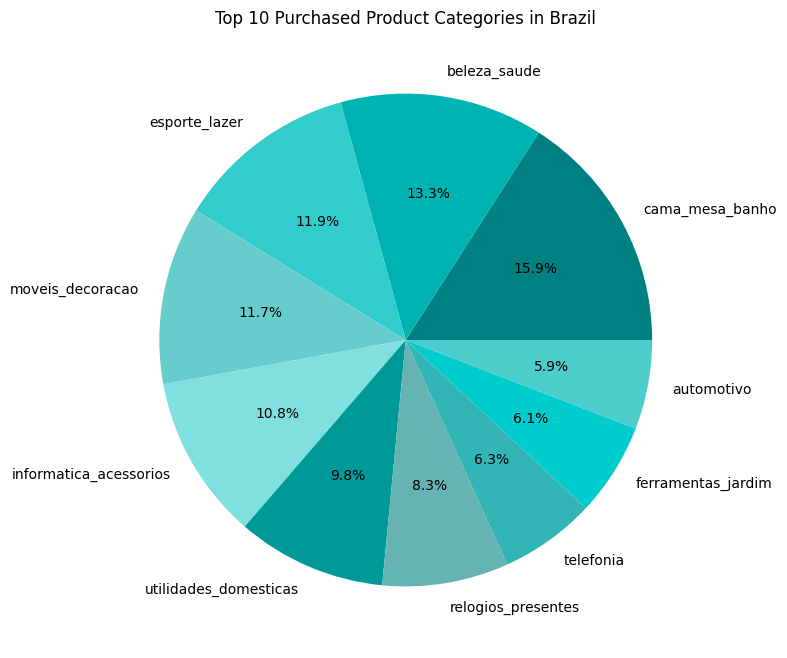

In [43]:
top_products = (
    df_clean.groupby('product_category_name')['order_purchase_timestamp']
    .count()
    .sort_values(ascending=False)
    .head(10)  # Top 10
)


colors = ['#008080', '#00b3b3', '#33cccc', '#66cccc', '#80e0e0',
          '#009999', '#66b3b3', '#33b5b5', '#00cccc', '#4dcccc']  # 10 colors for the pie chart


plt.figure(figsize=(8, 8), facecolor='white')  # Set background to white


top_products.plot(kind='pie', autopct='%1.1f%%', colors=colors)

# Remove the label for the y-axis (optional for aesthetics)
plt.ylabel('')


plt.title('Top 10 Purchased Product Categories in Brazil')


plt.show()

In [44]:
df_clean['order_purchase_timestamp'].min()

Timestamp('2016-10-03 09:44:50')

In [45]:
df_clean['order_purchase_timestamp'].max()

Timestamp('2018-08-29 15:00:37')

In [46]:
df_rfm.sort_values(by='Monetary', ascending=False).head(20)

,customer_unique_id,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_Segment,Segment_labels
3676,0a0a92112bd4c708ca5fde585afaa872,333,1,13440.00,2,1,4,214,Top Recent
70855,c4b224d2c784bae11ae98b6ae9f2454c,457,1,10856.10,1,3,4,134,Top at Risk
48070,85963fd37bfd387aa6d915d8a1065486,195,1,9888.00,3,3,4,334,VIP
68621,be74c431147c32ab2d7c7cef5e4a995f,110,1,9520.14,4,3,4,434,VIP
85712,edf81e1f3070b9dac83ec83dacdbb9bc,497,1,7998.00,1,4,4,144,Top at Risk
5883,1033eef37a760a832f9b2332ce23fdc5,356,1,7799.40,1,1,4,114,Top at Risk
31851,58483a1c055dfb600f57c5b867174542,85,1,7798.00,4,2,4,424,Top Recent
78557,da122df9eeddfedc1dc1f5349a1a690c,514,2,7388.00,1,4,4,144,Top at Risk
42572,763c8b1c9c68a0229c42c9fc6f662b93,45,1,7160.00,4,2,4,424,Top Recent
45913,7f6fd66526ed914998d483cff9b7bdd7,155,1,6909.00,3,2,4,324,Top Recent


# Treemap of Customer Segments

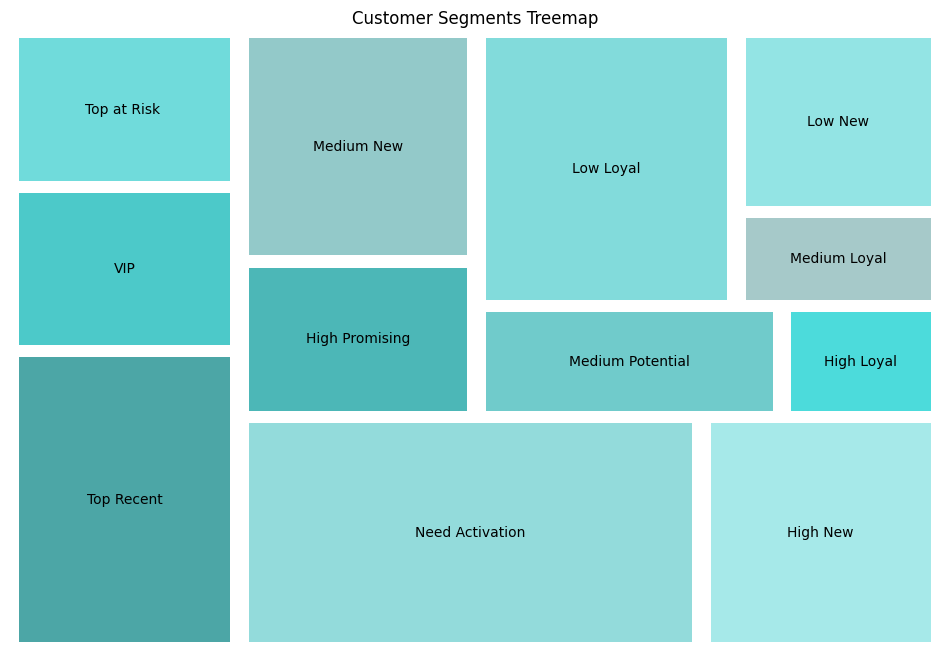

In [48]:
import squarify

seg_pareto['Segment_labels'].nunique()

seg_pareto['NumberOfCustomers'] = pd.to_numeric(seg_pareto['NumberOfCustomers'], errors='coerce')


seg_pareto = seg_pareto.dropna(subset=['NumberOfCustomers'])


seg_pareto = seg_pareto[seg_pareto['NumberOfCustomers'] > 0]


sizes = seg_pareto['NumberOfCustomers']
labels = seg_pareto['Segment_labels']


colors = ['#008080', '#00b3b3', '#33cccc', '#66cccc', '#80e0e0',
          '#009999', '#66b3b3', '#33b5b5', '#00cccc', '#4dcccc',
          '#80b3b3', '#66d9d9', '#006666', '#0099cc', '#99cccc',
          '#00cccc', '#33b5b5', '#339999', '#66cccc', '#00b3b3']


plt.figure(figsize=(12, 8), facecolor='white')


squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.7, pad=True)


plt.axis('off')


plt.title("Customer Segments Treemap")
plt.show()